<a href="https://colab.research.google.com/github/BogdanGFTP/fastai_course/blob/master/Dogs%26cats_resnext50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from shutil import unpack_archive
unpack_archive('gdrive/My Drive/Fast.ai course files/dogscats.zip')

In [4]:
!pip install "fastai==0.7.0"
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install Pillow>=4.1.1
!pip install image
!pip install torchtext==0.2.3

!pip install seaborn --upgrade matplotlib
!pip install seaborn --upgrade pandas
!pip install seaborn --upgrade pillow
!pip install seaborn --upgrade plotly

    100% |████████████████████████████████| 122kB 8.0MB/s 
    100% |████████████████████████████████| 184kB 17.0MB/s 
    100% |████████████████████████████████| 71kB 25.6MB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 1.5MB 15.3MB/s 
    100% |████████████████████████████████| 3.6MB 9.8MB/s 
    100% |████████████████████████████████| 496.4MB 34kB/s 
    100% |████████████████████████████████| 92kB 6.8MB/s 
    100% |████████████████████████████████| 61kB 20.3MB/s 
    100% |████████████████████████████████| 11.6MB 2.9MB/s 
    100% |████████████████████████████████| 81kB 23.4MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0a

In [5]:
!pip install pillow==4.1.1

    100% |████████████████████████████████| 5.7MB 7.3MB/s 
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


In [0]:
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "dogscats/"
sz = 229
arch = resnext50
bs = 28

In [8]:
!wget -O /usr/local/lib/python3.6/dist-packages/fastai/weights.tgz http://files.fast.ai/models/weights.tgz

--2018-12-29 11:23:03--  http://files.fast.ai/models/weights.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195411318 (1.1G) [text/plain]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/fastai/weights.tgz’

/usr/local/lib/pyth 100%[===================>]   1.11G  36.4MB/s    in 32s     

2018-12-29 11:23:35 (35.6 MB/s) - ‘/usr/local/lib/python3.6/dist-packages/fastai/weights.tgz’ saved [1195411318/1195411318]



In [9]:
!tar xvfz /usr/local/lib/python3.6/dist-packages/fastai/weights.tgz -C /usr/local/lib/python3.6/dist-packages/fastai

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


In [10]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 72/72 [00:28<00:00,  3.36it/s]


In [11]:
learn.fit(1e-2, 1)
learn.precompute = False

epoch      trn_loss   val_loss   accuracy   
    0      0.047364   0.023435   0.9895    



In [12]:
learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.03413    0.023128   0.992     
    1      0.042137   0.020946   0.9935    



[array([0.02095]), 0.9935000014305114]

In [0]:
learn.unfreeze()
lr=np.array([1e-4, 1e-3, 1e-2])

In [14]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.054431   0.020995   0.993     
    1      0.029016   0.015599   0.9945    
    2      0.020466   0.017058   0.994     



[array([0.01706]), 0.9940000011920929]

In [0]:
learn.save('224_all_50')

In [0]:
learn.load('224_all_50')

In [17]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)
accuracy_np(probs, y)

0.9945

**Analyzing results**

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:, 1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[995   5]
 [  6 994]]


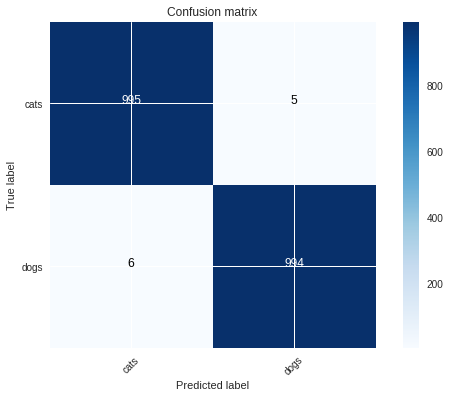

In [19]:
plot_confusion_matrix(cm, data.classes)

In [0]:
def rand_by_mask(mask): return np.random.choise(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
  imgs = np.stack([data.val_ds[x][0] for x in idxs])
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12, 6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows, len(ims)//rows, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
  imgs = [load_img_id(data.val_ds, x) for x in idxs]
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct):
  mult = -1 if (y==1)==is_correct else 1
  return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most incorrect cats


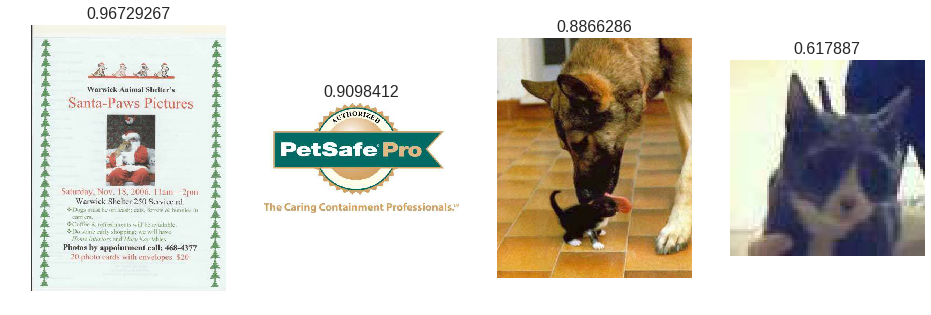

In [23]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


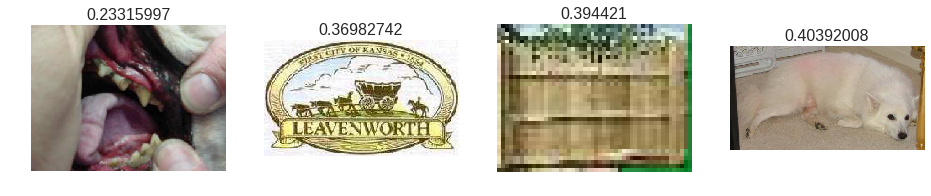

In [24]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")